In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
import random
import math


In [21]:
random.seed(42)

In [22]:
num_points = 50
dim=2
E = np.sort(np.random.uniform(-1,1,(num_points, dim))) # data set
f = np.random.uniform(-1,1,num_points) # function   

Text(0.5, 0, '$f:E \\to \\mathbb{R}$')

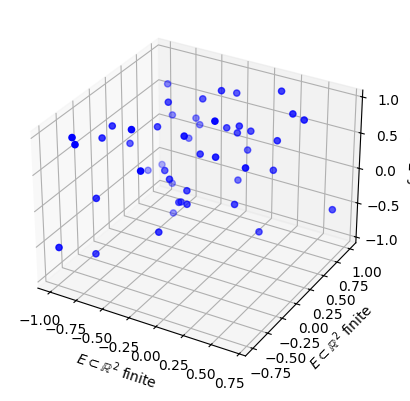

In [23]:
# pca = PCA(n_components=1)
# E_reduced = pca.fit_transform(E)

# plt.plot(E,f)
# plt.xlabel(r'$E\subset \mathbb{R}$ finite')
# plt.ylabel(r'$f:E \to \mathbb{R}$')
# plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(E[:, 0], E[:, 1], f, color='blue')

# Labels and title
ax.set_xlabel(r'$E\subset \mathbb{R}^2$ finite')
ax.set_ylabel(r'$E\subset \mathbb{R}^2$ finite')
ax.set_zlabel(r'$f:E \to \mathbb{R}$')

In [24]:
# A function to compute the minimal Lipschitz constant
def lipnorm(E,f):
  #max int representation value
  max_value = 0
  for i in range(len(E)-1):
    curr_value = 0
    for j in range(dim):
      curr_value += (E[i+1][j]- E[i][j])**2
      lip_value =  np.abs((f[i+1]-f[i]) / math.sqrt(curr_value))
      if lip_value > max_value:
        max_value = lip_value
  return max_value

In [25]:
# distance function
# can be used on arrays
# when applied to arrays, output an array of distances
def dist(x_val,E):
  distances = np.zeros(len(x_val))
  for i, element in enumerate(x_val):
    distances[i] = np.abs(np.min(element - E))
  return distances

In [26]:
# formula for lower and upper lipschitz extension

def lip_ext_lower(x_val, E, f):
    L = lipnorm(E, f)
    F = np.zeros(len(x_val))
    for i, element in enumerate(x_val):
        distances = np.linalg.norm(E - element, axis=1)
        F[i] = np.max([f[j] - L * distances[j] for j in range(len(E))])
    return F

def lip_ext_upper(x_val, E, f):
    L = lipnorm(E, f)
    F = np.zeros(len(x_val))
    for i, element in enumerate(x_val):
        distances = np.linalg.norm(E - element, axis=1)
        F[i] = np.min([f[j] + L * distances[j] for j in range(len(E))])
    return F


In [27]:

def generate_grid(n, num_points_per_dim, range_min=-1.1, range_max=1.1):
    """
    Generates a grid of points in R^n.
    
    Parameters:
    - n: int, number of dimensions.
    - num_points_per_dim: int, number of points per dimension.
    - range_min: float, minimum value in each dimension.
    - range_max: float, maximum value in each dimension.
    
    Returns:
    - E: np.ndarray, shape (num_points_per_dim**n, n), array of points in R^n.
    """
    linspaces = [np.linspace(range_min, range_max, num_points_per_dim) for _ in range(n)]
    grid = np.meshgrid(*linspaces)
    E = np.vstack([g.ravel() for g in grid]).T
    return E

x_val = np.sort(np.concatenate((generate_grid(dim, 200),E)))
y_val_lower = lip_ext_lower(x_val,E,f)
y_val_upper = lip_ext_upper(x_val,E,f)


L = lipnorm(E,f)

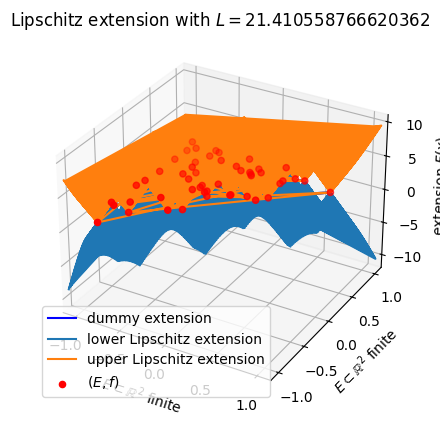

In [28]:
# plt.plot(x_val,y_val_lower, label = r'lower Lipschitz extension')
# plt.plot(x_val,y_val_upper, label = r'upper Lipschitz extension')
# plt.plot(E,f, label = r'dummy extension')
# plt.scatter(E,f, color = 'red', label=r'$(E,f)$')
# plt.xlim(-1.1,1.1)
# plt.ylim(0.1*L*np.min(f),0.1*L*np.max(f))
# plt.xlabel(r'$x\in \mathbb{R}$')
# plt.ylabel(r'extension $F(x)$')
# plt.title(r'Lipschitz extension with $L=$'+str(L))
# plt.legend()
# plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(E[:, 0], E[:, 1], f, color='blue', label = r'dummy extension')
ax.plot(x_val[:, 0], x_val[:, 1], y_val_lower, label = r'lower Lipschitz extension')
ax.plot(x_val[:, 0], x_val[:, 1],y_val_upper, label = r'upper Lipschitz extension')
ax.scatter(E[:, 0], E[:, 1], f, color='red', label = r'$(E,f)$')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

# Labels and title
ax.set_xlabel(r'$E\subset \mathbb{R}^2$ finite')
ax.set_ylabel(r'$E\subset \mathbb{R}^2$ finite')
ax.set_zlabel(r'extension $F(x)$')
ax.set_title(r'Lipschitz extension with $L=$'+str(L))
ax.legend()
